In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import os
import wget

In [2]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/Puntos_Newton-Gregory.txt'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file

In [3]:
Data = pd.read_csv(file)
Data

,X,Y
0,0.0,-18
1,1.5,-13
2,2.0,0
3,3.8,5
4,4.2,3
5,5.9,10


In [4]:
X = np.float64(Data.X)
Y = np.float64(Data.Y)

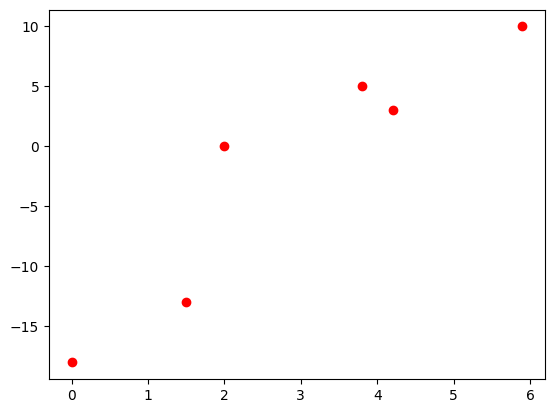

In [5]:
plt.scatter(X,Y,color='r',marker='o')

In [10]:
def divided_differences(x, y):
    n = len(x)
    coefficients = np.zeros([n, n])
    coefficients[:,0] = y
    
    for j in range(1, n):
        for i in range(n-j):
            coefficients[i][j] = (coefficients[i+1][j-1] - coefficients[i][j-1]) / (x[i+j] - x[i])
    
    return coefficients[0]

def newton_interpolation(x, y, x_eval):
    n = len(x)
    result = 0
    
    # Calculamos las diferencias divididas
    a = divided_differences(x, y)
    
    # Evaluamos el polinomio interpolante en x_eval
    for i in range(n):
        term = a[i]
        for j in range(i):
            term *= (x_eval - x[j])
        result += term
    
    return result

In [11]:
xt = np.linspace(X[0],X[-1],100)

yt = []

for i in range(len(xt)):
    yt.append(newton_interpolation(X,Y,xt[i]))

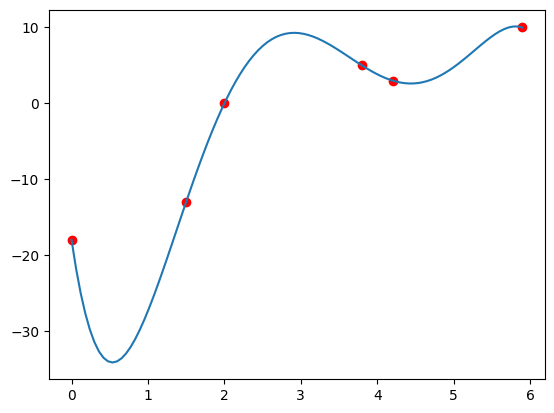

In [12]:
plt.scatter(X,Y,color='r',marker='o')
plt.plot(xt,yt)